# PS.0 (harmonic series)

The harmonic series satisfies 

\begin{equation}
 \sum_{k=1}^n \frac{1}{k} \rightarrow \infty.
\end{equation}

a) Write a function $n\mapsto harmonicSum(n)$ that returns $\sum_{k=1}^n \frac{1}{k}$. 

b) Plot this function between $10<n<10^6$.


In [1]:
# make sure Plots is installed
# using Pkg
# Pkg.add("Plots")

In [2]:
function harmonicSum(n)
    s = 0
    for k = 1:n
        s += 1/k
    end
    return s
end

harmonicSum (generic function with 1 method)

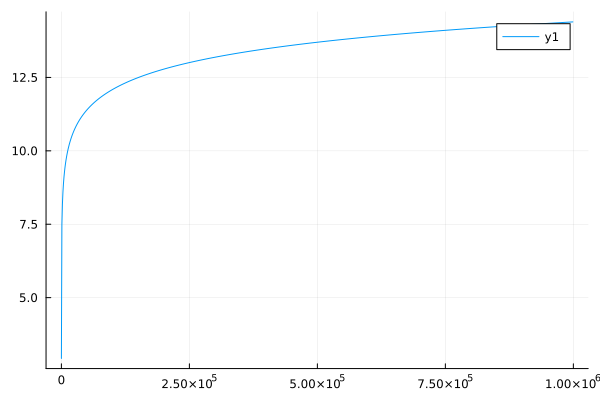

In [3]:
using Plots
x = 1e1:1e3:1e6
plot(
    x, 
    [harmonicSum(n) for n in x]
)

# PS.0 (alternate harmonic series)
    
The alternate harmonic series satisfies    
    
\begin{equation}
 \lim_{n\rightarrow\infty}\sum_{k=1}^n \frac{(-1)^{k+1}}{k} = \ln(2).
\end{equation}

a)  Write a function $n\mapsto harmonicAlternateSum(n)$ that returns $\sum_{k=1}^n \frac{(-1)^{k+1}}{k}$. 

b) Check numerically if
\begin{equation}
\frac{\left|\sum_{k=1}^{n+1} \frac{(-1)^{k+1}}{k} - \ln(2)\right| }{\left|\sum_{k=1}^n \frac{(-1)^{k+1}}{k} - \ln(2)\right|} \rightarrow 1
\end{equation}

c) Check numerically if 

\begin{equation}
\lim_{n\rightarrow\infty} \left|\sum_{k=1}^n \frac{(-1)^{k+1}}{k}-\ln(2) \right|^{1/n} =1
\end{equation}

In [4]:
function harmonicAlternateSum(n)
    s = 0
    for k = 1:n
        s += (-1)^(k + 1) / k
    end
    return s
end

harmonicAlternateSum (generic function with 1 method)

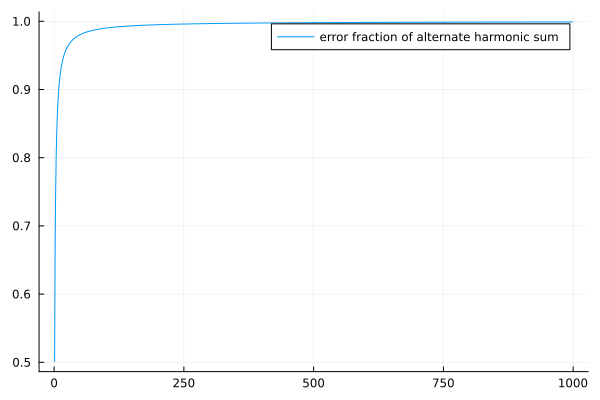

In [5]:
m = 1e2:1e2:1e5
error = abs.([harmonicAlternateSum(n) - log(2) for n in m])
plot(
    error[2:end]./error[1:end-1],
    label="error fraction of alternate harmonic sum"
)

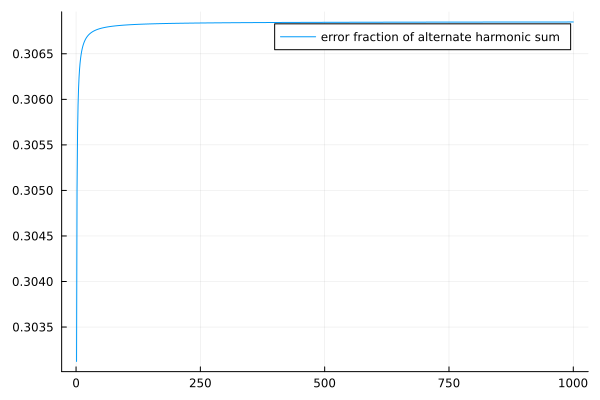

In [6]:
m = 1e2:1e2:1e5
error = abs.([harmonicAlternateSum(n)^(1/n)  - log(2) for n in m])
plot(
    error,
    label="error fraction of alternate harmonic sum"
)

# PS.0 (p-q-formula)

The p-q-formula of quadratic equations leads to

\begin{equation}
x^2-2px+q = 0,\qquad\qquad
x_{1/2}  = p\pm\sqrt{p^2-q}.
\end{equation}

a) Write a function $(p,q)\mapsto myPQnaive(p,q)$ that returns the zeros $x_1$ and $x_2$. 

b) nothing to do here (in a few weeks we will have learned why a) is too naive and how to do better)

In [7]:
function myPQnaive(p,q)
    root = sqrt(p^2 - q)
    x1 = p - root
    x2 = p + root
    return x1, x2
end

myPQnaive (generic function with 1 method)

# PS.0 (vector of matrices) 

Given $v_1,\ldots v_m\in\mathbb{R}^{n\times n}$, consider 

$$
s = v_1+\ldots+v_m,\qquad p = v_1\cdots v_m.
$$

a) Assume that $v$ is a length $m$ (julia-)vector of $n\times n$ matrices. Write a function $v\mapsto mySumProd(v)$ that returns the sum $s$ and the product $p$ all matrices. 

b) Test your function $𝑚𝑦𝑆𝑢𝑚𝑃𝑟𝑜𝑑$

In [8]:
function mySumProd(v)
    s = reduce(+, v)
    p = reduce(*, v)
    return s, p
end

mySumProd (generic function with 1 method)

In [10]:
using Test, LinearAlgebra
@testset "myTests" begin     
       v = []
       for k in 1:10
           A = randn(20,20) 
           push!(v,A)
           push!(v,-A)
           push!(v,inv(A))
           push!(v,-inv(A))
       end
       s,p = mySumProd(v)
       
       @test  s == zeros(20, 20)
       @test  p == Matrix(I, 20, 20)
end

myTests: Test Failed at In[10]:14
  Expression: p == Matrix(I, 20, 20)
   Evaluated: [0.9999999999999101 3.052610006353416e-14 … 4.114497014353771e-14 -4.8674576746542486e-14; -3.364709217398239e-14 1.0000000000000246 … 3.822448634692617e-14 6.338298293061662e-14; … ; -7.896012222507254e-14 8.280847335463716e-14 … 1.0000000000000409 1.665803699103734e-14; 2.5482862960656424e-13 1.827965163754382e-13 … -1.293592974383457e-13 1.0000000000003624] == Bool[1 0 … 0 0; 0 1 … 0 0; … ; 0 0 … 1 0; 0 0 … 0 1]
Stacktrace:
 [1] macro expansion
   @ /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/Test/src/Test.jl:464 [inlined]
 [2] macro expansion
   @ ./In[10]:14 [inlined]
 [3] macro expansion
   @ /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/Test/src/Test.jl:1357 [inlined]
 [4] top-level scope
   @ ./In[10]:3
Test Summary: | Pass  Fail  Total  Time
myTests       |    1     1      2  2.4s


LoadError: [91mSome tests did not pass: 1 passed, 1 failed, 0 errored, 0 broken.[39m

# PS.0 (Fibonacci)

The Fibonacci sequence $(a_k)_{k\in\mathbb{N}}$ satisfies 

$$
a_{k+1} = a_{k}+a_{k-1},\qquad a_1=1,\quad a_0=0.
$$

a) Write a recursive function $n\mapsto myFibo(n)$ that returns the $n$-th Fibonacci number.

b) Write a function $n\mapsto myFiboVector(n)$ that returns the vector of the first $n$ Fibonacci numbers $(a_0,\ldots,a_{n-1})^\top$. 

In [11]:
function myFibo(n::Int64)
    if n <= 1
        return n

    else
        return myFibo(n - 1) + myFibo(n - 2)
        
    end
end

function myFiboVector(n)
    a = [0]
    for i = 1:n
        append!(a, myFibo(i))
    end
    return a
end

myFiboVector (generic function with 1 method)